In [1]:
import pandas as pd
import seaborn as sns
from aequitas import preprocessing as pp
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plotting
import sys
from sys import exit

%matplotlib inline 

/Users/lorenh/Documents/DSaPP/.aequitas/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:

sys.path.insert(0, '/Users/lorenh/Documents/DSaPP/aequitas/src/aequitas_cli')
from aequitas_audit import audit

In [3]:
sys.path.insert(0, '/Users/lorenh/Documents/DSaPP/aequitas/src')
from tests.test_bias_report import test_all_0_scores_4, test_all_1_scores_3, test_common_attributes_2, test_plot_fcns_1

## View how tests work for passed tests

#### Test 2

In [4]:
df_mix = pd.read_csv("../../../src/tests/test_2.csv")
df_mix

,label_value,score,class,not_class
0,1,1,High,High
1,1,0,Low,Low
2,1,0,High,High
3,1,1,Low,Low
4,1,1,High,High
5,0,1,Low,Low
6,0,0,High,High
7,0,0,Low,Low
8,0,1,High,High
9,0,1,Low,Low


In [5]:
df_mix, _ = pp.preprocess_input_df(df_mix, ['score', 'label_value'])
df_mix

,label_value,score,class,not_class
0,1,1,High,High
1,1,0,Low,Low
2,1,0,High,High
3,1,1,Low,Low
4,1,1,High,High
5,0,1,Low,Low
6,0,0,High,High
7,0,0,Low,Low
8,0,1,High,High
9,0,1,Low,Low


In [6]:
df_mix['score'].value_counts()

1    6
0    4
Name: score, dtype: int64

In [7]:
g1 = Group()
xtab, _ = g1.get_crosstabs(df_mix)

model_id, score_thresholds 1 {'rank_abs': [6]}
COUNTS::: class
High    5
Low     5
dtype: int64
COUNTS::: not_class
High    5
Low     5
dtype: int64


In [8]:
test_common_attributes_2()

Welcome to Aequitas-Audit
Fairness measures requested: Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FNR Parity,FOR Parity,TPR Parity,Precision Parity
model_id, score_thresholds 1 {'rank_abs': [6]}
COUNTS::: class
High    5
Low     5
dtype: int64
COUNTS::: not_class
High    5
Low     5
dtype: int64
audit: df shape from the crosstabs: (4, 26)
get_disparity_predefined_group()
Any NaN?:  False
bias_df shape: (4, 46)
Fairness Threshold: 0.8
Fairness Measures: ['Statistical Parity', 'Impact Parity', 'FDR Parity', 'FPR Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Precision Parity']
{'Unsupervised Fairness': True, 'Supervised Fairness': False, 'Overall Fairness': False}
****************** 0    0.5
1    0.5
2    0.5
3    0.5
Name: group_size_pct, dtype: object
testing group_size ...
testing pp ...
testing ppr ...
testing pprev ...
testing group_label_pos ...
testing group_label_neg ...
testing pn ...
testing tp ...
testing fp ...
testing tn ...
testing fn ...
testing fpr ...
te

## Test 10: test_plot_fcns_1()

In [9]:
df10 = pd.read_csv("../../../src/tests/test_10.csv")
df10

,label_value,score,class_1,class_2
0,1,1,High,High
1,1,0,Low,High
2,1,0,High,High
3,1,1,Low,High
4,1,1,High,High
5,0,1,Low,High
6,0,0,High,High
7,0,0,Low,High
8,0,1,High,High
9,0,1,Low,High


In [10]:
g10 = Group()
xtab10, _ = g1.get_crosstabs(df10)

model_id, score_thresholds 1 {'rank_abs': [8]}
COUNTS::: class_1
High    7
Low     7
dtype: int64
COUNTS::: class_2
High    10
Low      4
dtype: int64


In [11]:
b10 = Bias()
b10df = b10.get_disparity_predefined_groups(xtab10, {'class_1': 'High', 'class_2': 'High'})

get_disparity_predefined_group()


In [12]:
f10 = Fairness()
fdf_10 = f10.get_group_value_fairness(b10df, fair_measures_requested=['Statistical Parity','Impact Parity','FDR Parity','FPR Parity','FNR Parity','FOR Parity','TPR Parity','Precision Parity'])
fdf_10.style

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,class_1,High,8,1,binary 0/1,0.6,0.5,0.666667,0.25,0.5,0.4,0.333333,0.75,4,3,0.5,0.571429,1,2,1,3,2,5,7,14,0.714286,1,1,1,1,1,1,1,1,1,1,High,High,High,High,High,High,High,High,High,High,True,True,True,True,True,True,True,True,True,True,True,True,True
1,class_1,Low,8,1,binary 0/1,0.5,0.333333,0.666667,0.5,0.666667,0.5,0.333333,0.5,4,3,0.5,0.571429,2,2,1,2,3,4,7,14,0.571429,1,1,0.666667,2,1,1.33333,1.25,0.833333,0.666667,1,High,High,High,High,High,High,High,High,High,High,True,True,False,False,True,True,True,False,False,True,False,True,False
2,class_2,High,8,1,binary 0/1,0.6,0.4,0.5,0.5,0.6,0.4,0.5,0.5,6,4,0.75,0.6,3,2,2,3,5,5,10,14,0.5,1,1,1,1,1,1,1,1,1,1,High,High,High,High,High,High,High,High,High,High,True,True,True,True,True,True,True,True,True,True,True,True,True
3,class_2,Low,8,1,binary 0/1,0.5,nan,1,0,nan,0.5,0,1,2,2,0.25,0.5,0,2,0,2,0,4,4,14,1,0.333333,0.833333,2,0,2,nan,1.25,0.833333,nan,0,High,High,High,High,High,High,High,High,High,High,False,True,False,nan,False,True,True,False,False,False,False,False,False


In [13]:
exp_10 = pd.read_csv("../../../src/tests/expected_output_test_10.csv")
exp_10.style

,Unnamed: 0,attribute_name,attribute_value,group_size,pp,ppr,pprev,group_label_pos,group_label_neg,pn,tp,fp,tn,fn,fpr,fnr,fdr,for,fnr_disparity,fpr_disparity,for_disparity,fdr_disparity,ppr_disparity,pprev_disparity,FNR Parity,FPR Parity,FOR Parity,FDR Parity,Statistical Parity,Impact Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,0,class_1,High,7,4,0.5,0.571429,5,2,3,3,1,1,2,0.5,0.4,0.25,0.666667,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True
1,1,class_1,Low,7,4,0.5,0.571429,4,3,3,2,2,1,2,0.666667,0.5,0.5,0.666667,1.25,1.33333,1,2,1,1,True,True,True,True,True,True,True,True,True,True
2,2,class_2,High,10,6,0.75,0.6,5,5,4,3,3,2,2,0.6,0.4,0.5,0.5,1,1,1,1,1,1,True,True,True,True,True,True,True,True,True,True
3,3,class_2,Low,4,2,0.25,0.5,4,0,2,2,0,0,2,nan,0.5,0,1,1.25,nan,2,0,0.333333,0.833333,True,nan,True,False,False,True,False,True,False,False


In [14]:
fdf_10[list(set(fdf_10.columns) & set(exp_10.columns))].style

,FPR Parity,tn,Statistical Parity,FOR Parity,for,fn,group_size,Supervised Fairness,ppr,tp,fnr_disparity,attribute_name,group_label_pos,fpr_disparity,TypeI Parity,TypeII Parity,pprev,for_disparity,ppr_disparity,Impact Parity,fpr,fdr_disparity,FDR Parity,fnr,Unsupervised Fairness,FNR Parity,pprev_disparity,pp,fdr,pn,group_label_neg,attribute_value,fp
0,True,1,True,True,0.666667,2,7,True,0.5,3,1,class_1,5,1,True,True,0.571429,1,1,True,0.5,1,True,0.4,True,True,1,4,0.25,3,2,High,1
1,False,1,True,True,0.666667,2,7,False,0.5,2,1.25,class_1,4,1.33333,False,True,0.571429,1,1,True,0.666667,2,False,0.5,True,True,1,4,0.5,3,3,Low,2
2,True,2,True,True,0.5,2,10,True,0.75,3,1,class_2,5,1,True,True,0.6,1,1,True,0.6,1,True,0.4,True,True,1,6,0.5,4,5,High,3
3,nan,0,False,False,1,2,4,False,0.25,2,1.25,class_2,4,nan,False,False,0.5,2,0.333333,True,nan,0,False,0.5,False,True,0.833333,2,0,2,0,Low,0


In [15]:
exp_10[list(set(fdf_10.columns) & set(exp_10.columns))].style

,FPR Parity,tn,Statistical Parity,FOR Parity,for,fn,group_size,Supervised Fairness,ppr,tp,fnr_disparity,attribute_name,group_label_pos,fpr_disparity,TypeI Parity,TypeII Parity,pprev,for_disparity,ppr_disparity,Impact Parity,fpr,fdr_disparity,FDR Parity,fnr,Unsupervised Fairness,FNR Parity,pprev_disparity,pp,fdr,pn,group_label_neg,attribute_value,fp
0,True,1,True,True,0.666667,2,7,True,0.5,3,1,class_1,5,1,True,True,0.571429,1,1,True,0.5,1,True,0.4,True,True,1,4,0.25,3,2,High,1
1,True,1,True,True,0.666667,2,7,True,0.5,2,1.25,class_1,4,1.33333,True,True,0.571429,1,1,True,0.666667,2,True,0.5,True,True,1,4,0.5,3,3,Low,2
2,True,2,True,True,0.5,2,10,True,0.75,3,1,class_2,5,1,True,True,0.6,1,1,True,0.6,1,True,0.4,True,True,1,6,0.5,4,5,High,3
3,nan,0,False,True,1,2,4,False,0.25,2,1.25,class_2,4,nan,False,True,0.5,2,0.333333,True,nan,0,False,0.5,False,True,0.833333,2,0,2,0,Low,0


Check Iris's change to line 72 in testing helper:

##### Calculated DF:
FDR Parity for class_1: 'Low' is False

FPR Parity for class_1: 'Low' is False

FOR Parity for class_2: 'Low' is False (should be, disparity of 2)

TypeI Parity for class_1: 'Low' is False

TypeII Parity for class_2: 'Low' is False

Supervised Fairness for class_1: 'Low' is False

##### Expected DF:
FDR Parity for class_1: 'Low' is True

FPR Parity for class_1: 'Low' is True

FOR Parity for class_2: 'Low' is True

TypeI Parity for class_1: 'Low' is True

TypeII Parity for class_2: 'Low' is True

Supervised Fairness for class_1: 'Low' is True


##### Matches
'fdr' matches on both (class_1 High: 0.25; class_1 Low: 0.5; class_2 High: 0.5; class_2 Low: 0)

'fdr_disparity' matches on both (class_1 High: 1; class_1 Low: 2; class_2 High: 1; class_2 Low: 0)

'fpr' matches on both (class_1 High: 0.5; class_1 Low: 0.666667; class_2 High: 0.6; class_2 Low: NaN)

'fpr_disparity' matches on both (class_1 High: 1; class_1 Low: 1.33333; class_2 High: 1; class_2 Low: NaN)

'for' matches on both (class_1 High: 0.666667; class_1 Low: 0.666667; class_2 High: 0.5; class_2 Low: 1)

'for_disparity' matches on both (class_1 High: 1; class_1 Low: 1; class_2 High: 1; class_2 Low: 2)


### With Iris' new line:

All pass metrics pass for test_10.csv

Welcome to Aequitas-Audit
Fairness measures requested: Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FNR Parity,FOR Parity,TPR Parity,Precision Parity
model_id, score_thresholds 1 {'rank_abs': [8]}
COUNTS::: class_1
High    7
Low     7
dtype: int64
COUNTS::: class_2
High    10
Low      4
dtype: int64
audit: df shape from the crosstabs: (4, 26)
get_disparity_predefined_group()
Any NaN?:  True
bias_df shape: (4, 46)


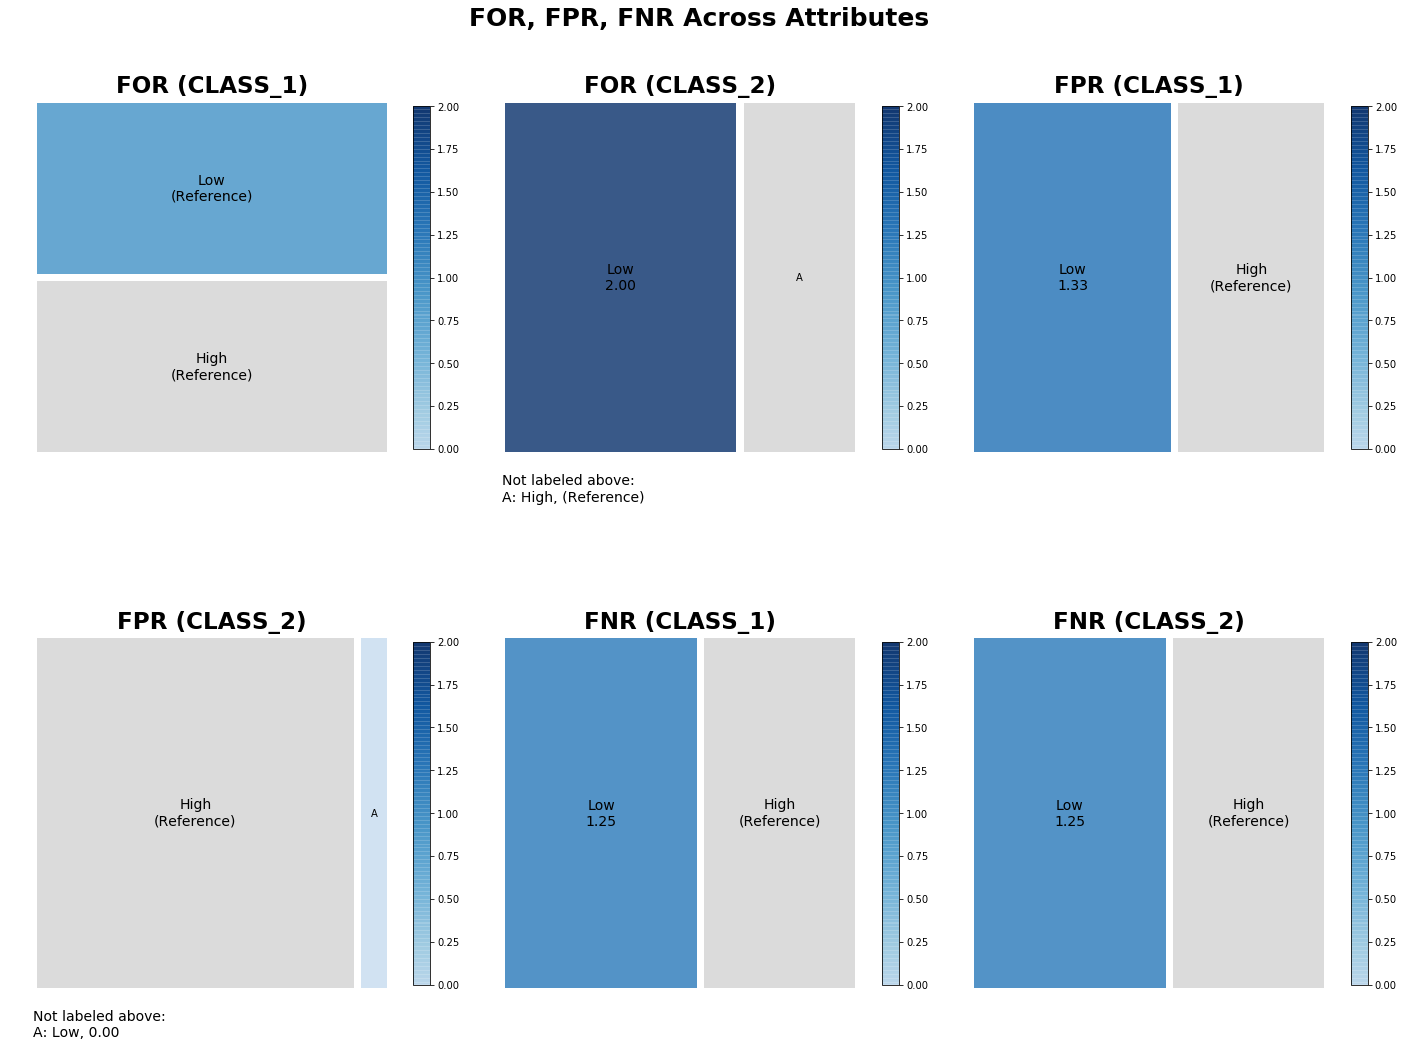

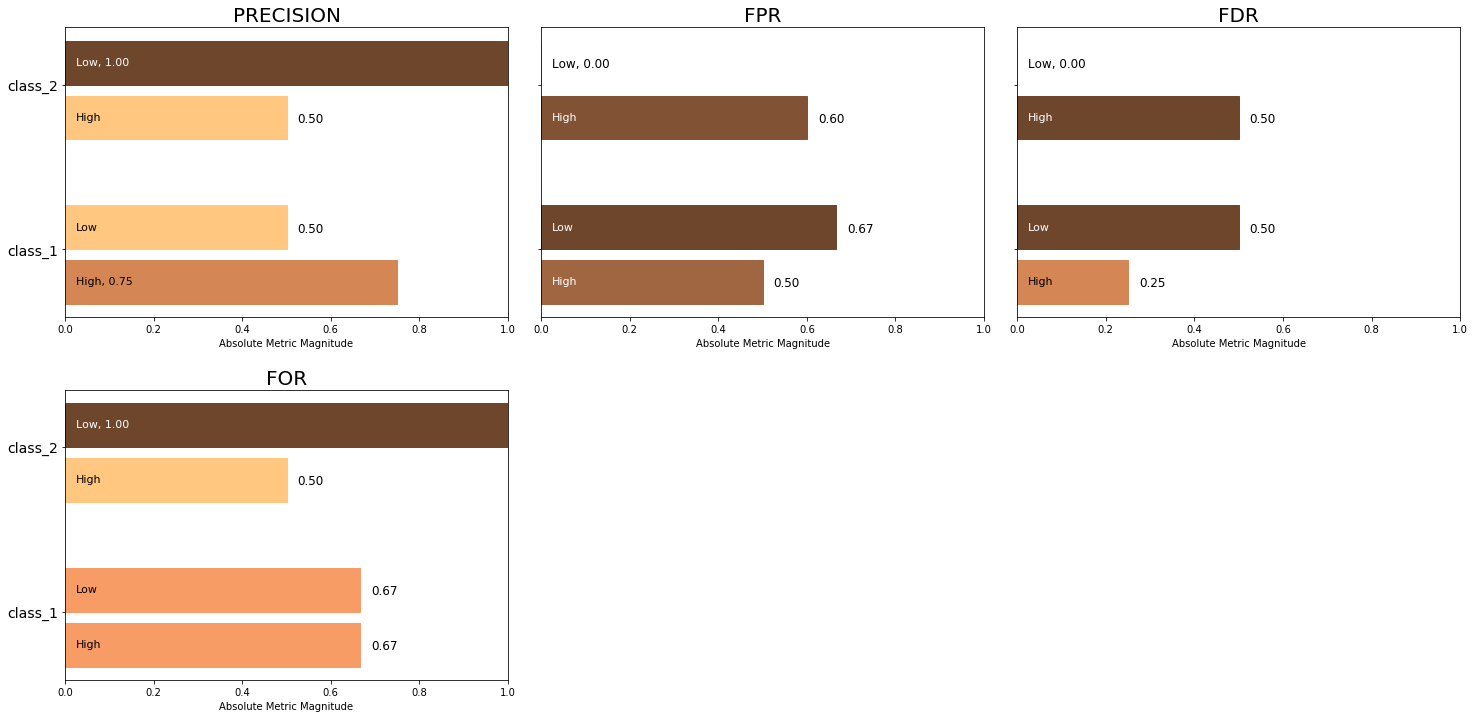

Fairness Threshold: 0.5
Fairness Measures: ['Statistical Parity', 'Impact Parity', 'FDR Parity', 'FPR Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Precision Parity']


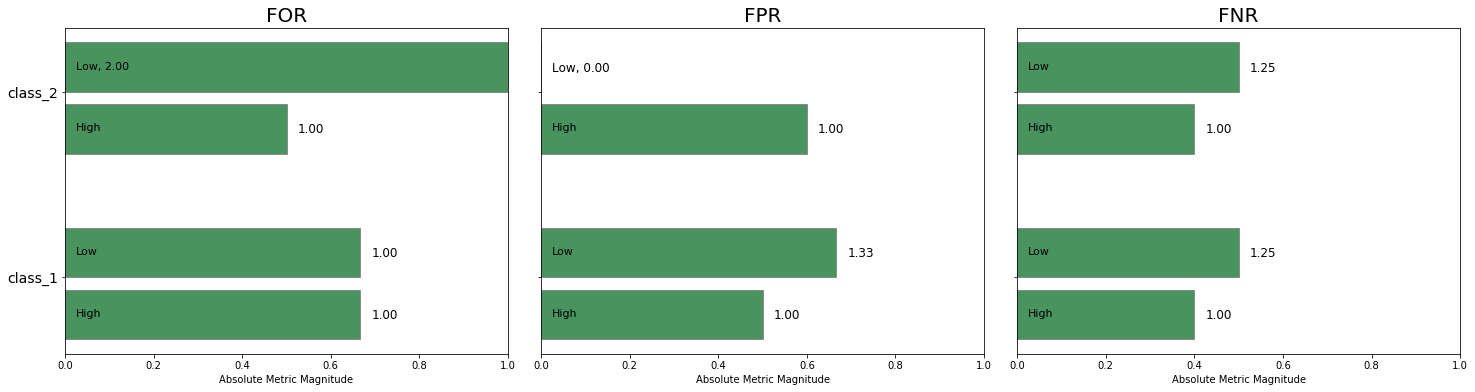

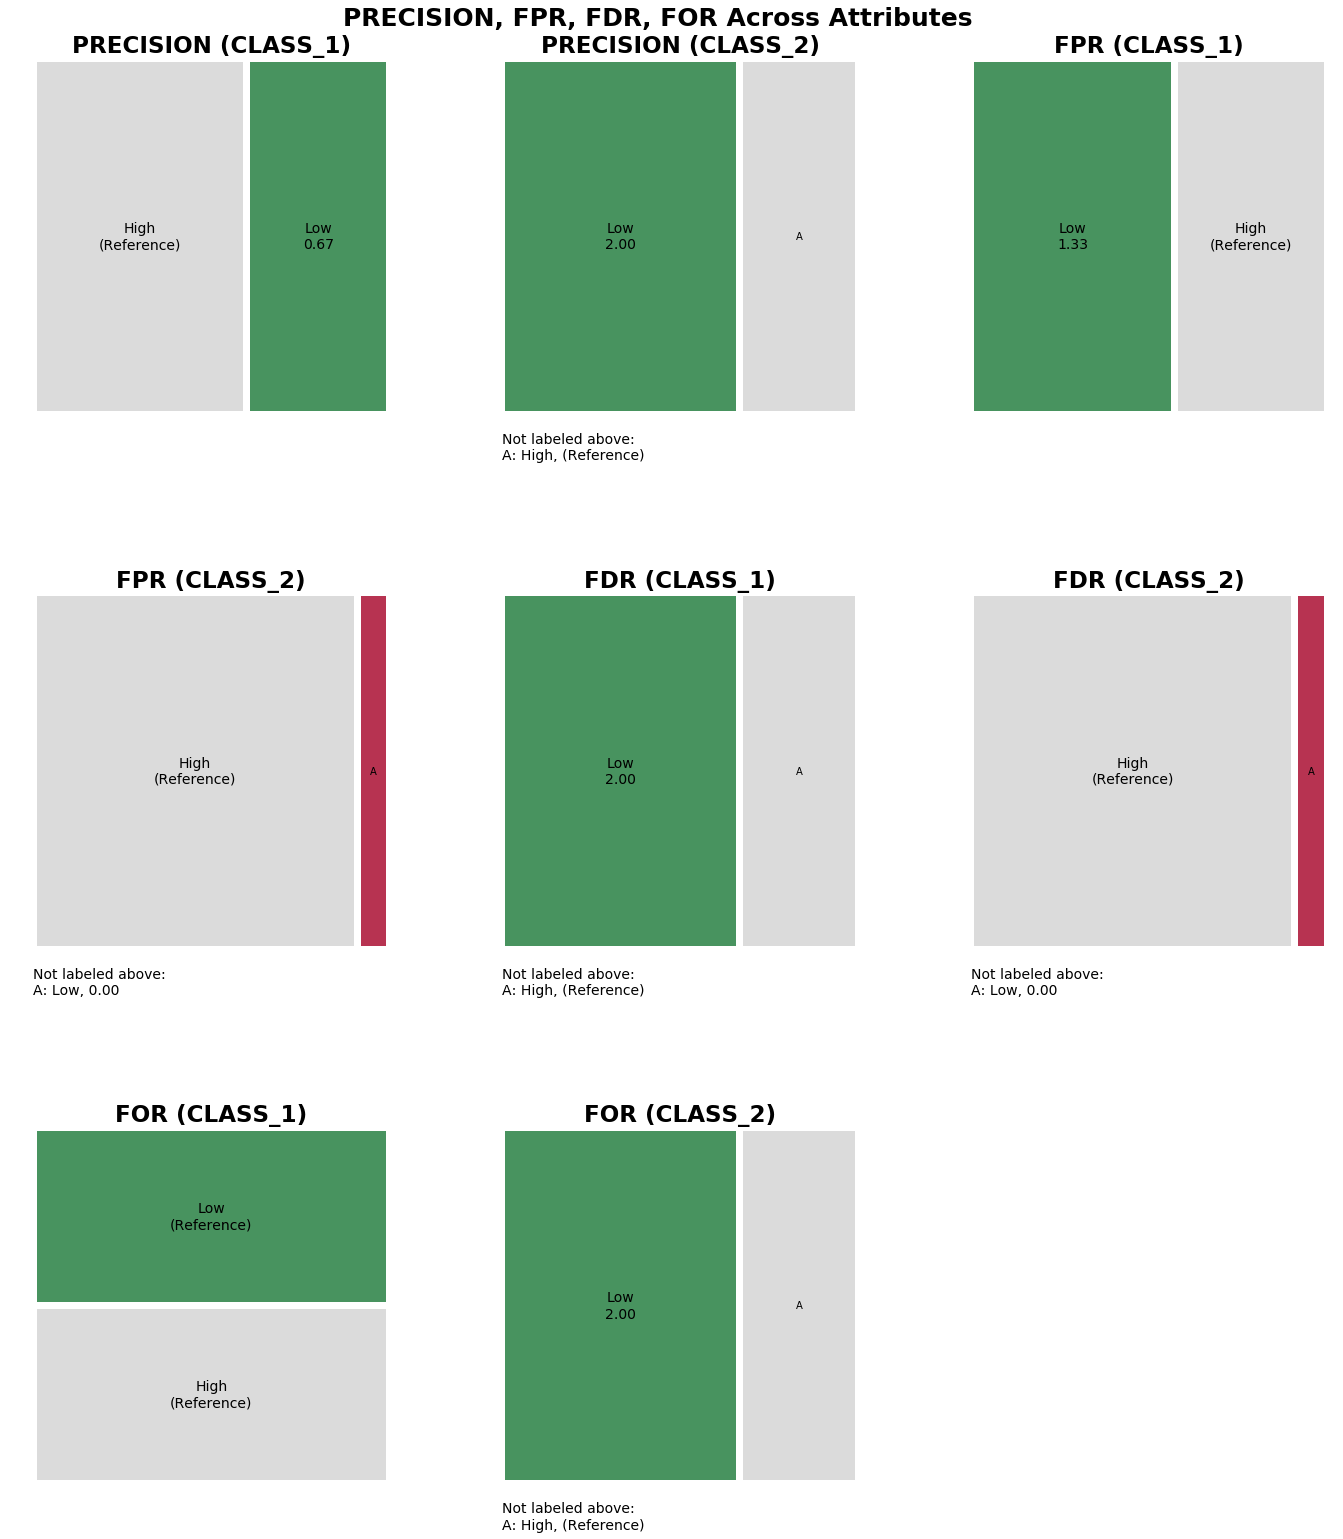

{'Unsupervised Fairness': False, 'Supervised Fairness': False, 'Overall Fairness': False}
****************** 0     0.5
1     0.5
2    0.71
3    0.29
Name: group_size_pct, dtype: object
testing group_size ...
testing pp ...
testing ppr ...
testing pprev ...
testing group_label_pos ...
testing group_label_neg ...
testing pn ...
testing tp ...
testing fp ...
testing tn ...
testing fn ...
testing fpr ...
testing fnr ...
testing fdr ...
testing for ...
testing fnr_disparity ...
testing fpr_disparity ...
testing for_disparity ...
testing fdr_disparity ...
testing ppr_disparity ...
testing pprev_disparity ...
testing FNR Parity ...
testing FPR Parity ...
testing FOR Parity ...
testing FDR Parity ...
testing Statistical Parity ...
testing Impact Parity ...
testing TypeI Parity ...
testing TypeII Parity ...
testing Unsupervised Fairness ...
testing Supervised Fairness ...


In [16]:
test_plot_fcns_1()

## Test 3: test_all_1_scores_3()

In [17]:
df1s = pd.read_csv("../../../src/tests/test_3.csv")
df1s

,label_value,score,class
0,1,1,High
1,1,1,Low
2,1,1,High
3,1,1,Low
4,1,1,High
5,0,1,Low
6,0,1,High
7,0,1,Low
8,0,1,High
9,0,1,Low


In [18]:
df1s['score'].value_counts()

1    10
Name: score, dtype: int64

In [19]:
g3 = Group()
xtab3, _ = g3.get_crosstabs(df1s)

model_id, score_thresholds 1 {'rank_abs': [10]}
COUNTS::: class
High    5
Low     5
dtype: int64


In [20]:
b3 = Bias()
b3df = b3.get_disparity_predefined_groups(xtab3, {'class': 'High'})

get_disparity_predefined_group()


In [21]:
f3 = Fairness()

In [22]:
f3.get_group_value_fairness(b3df, fair_measures_requested=['Statistical Parity','Impact Parity','FDR Parity','FPR Parity,FNR Parity','FOR Parity','TPR Parity','Precision Parity']).style

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FOR Parity,TPR Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,class,High,10,1,binary 0/1,1,0,nan,0.4,1,0,nan,0.6,5,0,0.5,1,2,0,0,3,2,3,5,10,0.6,1,1,1,1,nan,1,nan,1,nan,nan,High,High,High,High,High,High,High,High,High,High,True,True,True,nan,True,True,True,nan,True,True,False
1,class,Low,10,1,binary 0/1,1,0,nan,0.6,1,0,nan,0.4,5,0,0.5,1,3,0,0,2,3,2,5,10,0.4,1,1,0.666667,1.5,nan,1,nan,1,nan,nan,High,High,High,High,High,High,High,High,High,High,True,True,False,nan,True,False,False,nan,True,True,False


In [23]:
from aequitas_cli.utils.configs_loader import Configs

In [24]:
check_config = Configs.load_configs("../../../src/tests/test_1.yaml")
check_config.__dict__

{'ref_groups_method': 'predefined',
 'fairness_threshold': 0.8,
 'attr_cols': None,
 'report': True,
 'score_thresholds': None,
 'ref_groups': {'class': 'High'},
 'db': None,
 'fair_measures_requested': ['Statistical Parity',
  'Impact Parity',
  'FDR Parity',
  'FPR Parity',
  'FNR Parity',
  'FOR Parity',
  'TPR Parity',
  'Precision Parity'],
 'project_description': {'title': '', 'goal': ''},
 'plot_bias_metrics': [],
 'plot_bias_disparities': []}

In [25]:
test_df3, _ = audit(df1s, check_config)

Welcome to Aequitas-Audit
Fairness measures requested: Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FNR Parity,FOR Parity,TPR Parity,Precision Parity
model_id, score_thresholds 1 {'rank_abs': [10]}
COUNTS::: class
High    5
Low     5
dtype: int64
audit: df shape from the crosstabs: (2, 26)
get_disparity_predefined_group()
Any NaN?:  True
bias_df shape: (2, 46)
Fairness Threshold: 0.8
Fairness Measures: ['Statistical Parity', 'Impact Parity', 'FDR Parity', 'FPR Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Precision Parity']
{'Unsupervised Fairness': True, 'Supervised Fairness': False, 'Overall Fairness': False}
****************** 0    0.5
1    0.5
Name: group_size_pct, dtype: object


In [26]:
test_df3.style

,attribute_name,attribute_value,k,model_id,score_threshold,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,total_entities,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,ppr_ref_group_value,pprev_ref_group_value,precision_ref_group_value,fdr_ref_group_value,for_ref_group_value,fpr_ref_group_value,fnr_ref_group_value,tpr_ref_group_value,tnr_ref_group_value,npv_ref_group_value,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness,group_size_pct
0,class,High,10,1,binary 0/1,1,0,nan,0.4,1,0,nan,0.6,5,0,0.5,1,2,0,0,3,2,3,5,10,0.6,1,1,1,1,nan,1,nan,1,nan,nan,High,High,High,High,High,High,High,High,High,High,True,True,True,True,nan,nan,True,True,True,nan,True,True,False,0.5
1,class,Low,10,1,binary 0/1,1,0,nan,0.6,1,0,nan,0.4,5,0,0.5,1,3,0,0,2,3,2,5,10,0.4,1,1,0.666667,1.5,nan,1,nan,1,nan,nan,High,High,High,High,High,High,High,High,High,High,True,True,False,True,nan,nan,True,False,False,nan,True,True,False,0.5


In [27]:
import os
os.getcwd()

'/Users/lorenh/Documents/DSaPP/aequitas/docs/source/examples'

In [61]:
exp_3 = pd.read_csv('../../../src/tests/expected_output_test_3.csv')
exp_3.style

,reference_group,attribute_name,group_size_ref,pp_ref,ppr_ref,pprev_ref,group_label_pos_ref,group_label_neg_ref,pn_ref,tp_ref,fp_ref,tn_ref,fn_ref,fpr_ref,fnr_ref,fomr_ref,fdr_ref,attribute_value,group_size,pp,ppr,pprev,group_label_pos,group_label_neg,pn,tp,fp,tn,fn,fpr,fnr,fomr,fdr,fnr_disparity,fpr_disparity,fomr_disparity,fdr_disparity,ppr_disparity,pprev_disparity,FNR Parity,FPR Parity,FOR Parity,FDR Parity,Statistical Parity,Impact Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,High,class,5,5,0.5,1,3,2,0,3,2,0,0,1,0,nan,0.4,High,5,5,0.5,1,3,2,0,3,2,0,0,1,0,nan,0.4,nan,1,nan,1,1,1,nan,True,nan,True,True,True,True,nan,True,nan
1,High,class,5,5,0.5,1,3,2,0,3,2,0,0,1,0,nan,0.4,Low,5,5,0.5,1,2,3,0,2,3,0,0,1,0,nan,0.6,nan,1,nan,1.5,1,1,nan,True,nan,False,True,True,False,nan,True,False


In [60]:
test_df3_match = test_df3[[col for col in test_df3.columns if col in exp_3.columns]]
test_df3_match.style

,attribute_name,attribute_value,fdr,fpr,fnr,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,ppr_disparity,pprev_disparity,fdr_disparity,fpr_disparity,fnr_disparity,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,class,High,0.4,1,0,5,0,0.5,1,2,0,0,3,2,3,5,1,1,1,1,nan,True,True,True,True,nan,nan,True,nan,True,False
1,class,Low,0.6,1,0,5,0,0.5,1,3,0,0,2,3,2,5,1,1,1.5,1,nan,True,True,False,True,nan,nan,False,nan,True,False


In [55]:
exp_3_match = exp_3[[col for col in test_df3.columns if col in exp_3.columns]]
exp_3_match.style

,attribute_name,attribute_value,fdr,fpr,fnr,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_neg,group_label_pos,group_size,ppr_disparity,pprev_disparity,fdr_disparity,fpr_disparity,fnr_disparity,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,class,High,0.4,1,0,5,0,0.5,1,2,0,0,3,2,3,5,1,1,1,1,nan,True,True,True,True,nan,nan,True,nan,True,nan
1,class,Low,0.6,1,0,5,0,0.5,1,3,0,0,2,3,2,5,1,1,1.5,1,nan,True,True,False,True,nan,nan,False,nan,True,False


In [59]:
pd.concat([test_df3_match,exp_3_match]).drop_duplicates(keep=False).T

,0,0
attribute_name,class,class
attribute_value,High,High
fdr,0.4,0.4
fpr,1,1
fnr,0,0
pp,5,5
pn,0,0
ppr,0.5,0.5
pprev,1,1
fp,2,2


In [29]:
test_all_1_scores_3()

Welcome to Aequitas-Audit
Fairness measures requested: Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FNR Parity,FOR Parity,TPR Parity,Precision Parity
model_id, score_thresholds 1 {'rank_abs': [10]}
COUNTS::: class
High    5
Low     5
dtype: int64
audit: df shape from the crosstabs: (2, 26)
get_disparity_predefined_group()
Any NaN?:  True
bias_df shape: (2, 46)
Fairness Threshold: 0.8
Fairness Measures: ['Statistical Parity', 'Impact Parity', 'FDR Parity', 'FPR Parity', 'FNR Parity', 'FOR Parity', 'TPR Parity', 'Precision Parity']
{'Unsupervised Fairness': True, 'Supervised Fairness': False, 'Overall Fairness': False}
****************** 0    0.5
1    0.5
Name: group_size_pct, dtype: object
testing group_size ...
testing pp ...
testing ppr ...
testing pprev ...
testing group_label_pos ...
testing group_label_neg ...
testing pn ...
testing tp ...
testing fp ...
testing tn ...
testing fn ...
testing fpr ...
testing fnr ...
testing fdr ...
testing fnr_disparity ...
testing fpr_dis

Failed: Supervised Fairness fails: at least one entry was not the same between data sets


### Supervised Fairness: Fairness in both Type I and Type II Parity

Type I Parity: Fairness in both FDR Parity and FPR Parity

Type II Parity: Fairness in both FOR Parity and FNR Parity

In [30]:
test_df3[['fdr', 'FDR Parity', 'fpr', 'FPR Parity', 'for', 'FOR Parity', 'fnr', 'FNR Parity', 'TypeI Parity', 'TypeII Parity', 'Supervised Fairness']]


,fdr,FDR Parity,fpr,FPR Parity,for,FOR Parity,fnr,FNR Parity,TypeI Parity,TypeII Parity,Supervised Fairness
0,0.4,True,1.0,True,NaN,NaN,0.0,NaN,True,NaN,False
1,0.6,False,1.0,True,NaN,NaN,0.0,NaN,False,NaN,False


In [31]:
exp_3[['fdr', 'FDR Parity', 'fpr', 'FPR Parity', 'fomr', 'FOR Parity', 'fnr', 'FNR Parity', 'TypeI Parity', 'TypeII Parity','Supervised Fairness']]

,fdr,FDR Parity,fpr,FPR Parity,fomr,FOR Parity,fnr,FNR Parity,TypeI Parity,TypeII Parity,Supervised Fairness
0,0.4,True,1,True,NaN,NaN,0,NaN,True,NaN,NaN
1,0.6,False,1,True,NaN,NaN,0,NaN,False,NaN,False


#### Not comparing FOR values/ FOR disparity in testing

Would need to check on how expected results CSVs are generated, but would seem that tests are not comparing expected and calculated values for FOR/ FOR Disparity due to the difference in how False Omission Rate is named between the df generated from the test_3 CSV ('for') and the expected results CSV ('fomr'). When the DFs are merged, shared columns does not include False Omission Rate and is not checking that values match/ fall within predefined margin of error.

#### Handling of NaN values for Supervised Fairness (and Unsupervised Fairness)

Code indicates the Supervised (Unsupervised) Fairness should be NaN if both 'TypeI Parity' and 'TypeII Parity' ('Statistical Parity' & 'Impact Parity') are NaN, but should be False if only one is NaN. 

Options: 
1. Update Fairness() class so that if either is NaN, overall Supervised (Unsupervised) Fairness is also NaN
2. Update expected value for Supervised Fairness in this case to 'False'

In [32]:
set(test_df3.columns) & set(exp_3.columns)

{'FDR Parity',
 'FNR Parity',
 'FOR Parity',
 'FPR Parity',
 'Impact Parity',
 'Statistical Parity',
 'Supervised Fairness',
 'TypeI Parity',
 'TypeII Parity',
 'Unsupervised Fairness',
 'attribute_name',
 'attribute_value',
 'fdr',
 'fdr_disparity',
 'fn',
 'fnr',
 'fnr_disparity',
 'fp',
 'fpr',
 'fpr_disparity',
 'group_label_neg',
 'group_label_pos',
 'group_size',
 'pn',
 'pp',
 'ppr',
 'ppr_disparity',
 'pprev',
 'pprev_disparity',
 'tn',
 'tp'}

In [33]:
'for' in set(test_df3.columns) - set(exp_3.columns)

True

In [34]:
'fomr' in set(exp_3.columns) - set(test_df3.columns)

True

## Test 4: test_all_0_scores_4()

In [35]:
df0s = pd.read_csv("../../../src/tests/test_4.csv")
df0s

,label_value,score,class
0,1,0,High
1,1,0,Low
2,1,0,High
3,1,0,Low
4,1,0,High
5,0,0,Low
6,0,0,High
7,0,0,Low
8,0,0,High
9,0,0,Low


In [36]:
check = df0s['score'].value_counts()
check.loc[0.0]

10

In [37]:
# test proposed fix to Group() class to fix Test 4 error message
if 1.0 in check.index:
    count_ones = check[1.0]
else:
    count_ones = 0
count_ones

0

In [38]:
exp_4 = pd.read_csv("../../../src/tests/expected_output_test_4.csv")
exp_4.style

,reference_group,attribute_name,group_size_ref,pp_ref,ppr_ref,pprev_ref,group_label_pos_ref,group_label_neg_ref,pn_ref,tp_ref,fp_ref,tn_ref,fn_ref,fpr_ref,fnr_ref,fomr_ref,fdr_ref,attribute_value,group_size,pp,ppr,pprev,group_label_pos,group_label_neg,pn,tp,fp,tn,fn,fpr,fnr,fomr,fdr,fnr_disparity,fpr_disparity,for_disparity,fdr_disparity,ppr_disparity,pprev_disparity,FNR Parity,FPR Parity,FOR Parity,FDR Parity,Statistical Parity,Impact Parity,TypeI Parity,TypeII Parity,Unsupervised Fairness,Supervised Fairness
0,High,class,5,0,nan,0,3,2,5,0,0,2,3,0,1,0.6,nan,High,5,0,nan,0,3,2,5,0,0,2,3,0,1,0.6,nan,1,nan,1,nan,nan,nan,True,nan,True,nan,nan,nan,nan,True,nan,nan
1,High,class,5,0,nan,0,3,2,5,0,0,2,3,0,1,0.6,nan,Low,5,0,nan,0,2,3,5,0,0,3,2,0,1,0.4,nan,1,nan,0.666667,nan,nan,nan,True,nan,False,nan,nan,nan,nan,False,nan,False


In [39]:
test_all_0_scores_4()

ERROR:root:get_crosstabs: No threshold provided and there are no 1s in the score column.


Welcome to Aequitas-Audit
Fairness measures requested: Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FNR Parity,FOR Parity,TPR Parity,Precision Parity


NameError: name 'exit' is not defined